https://rasterio.readthedocs.io/en/latest/#

https://rasterio.readthedocs.io/en/stable/quickstart.html
    
Images from http://earthi.space/sample-data-download/ Milton Keynes dataset which has been processed to Level1 (radiometrically and sensor corrected).

* Imaging Satellite: DMC3 - FM1
* Imaging Mode: Strip Mode
* Orbit Direction: Ascending
* Off pointing angle: -10.002011°
* Acquisition date: 10th May 2016
* File Format: GeoTIFF
* Center Lon: -0.752130617
* Center Lat: 52.042331982

In [1]:
import os
import xmltodict
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pic_dir = '/Users/robincole/Pictures/earth-i-milton-keynes-l1a/MS'
files = os.listdir(pic_dir)
files

['TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001.tif',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_browser.jpg',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_rpc.txt',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_thumb.jpg',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_browser.png',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_browser.tif',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001.xml',
 'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_meta.xml']

/Users/robincole/Pictures/earth-i-milton-keynes-l1a/MS/TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001_browser.jpg


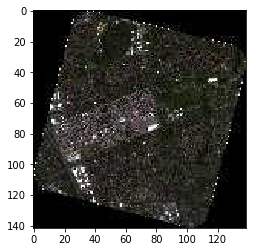

In [3]:
jpg = pic_dir + '/' + files[1]
print(jpg)

plt.imshow(plt.imread(jpg));

# Metadata

In [4]:
with open(pic_dir + '/' + files[-1]) as fd:
    doc = xmltodict.parse(fd.read())

In [5]:
doc

OrderedDict([('SceneMetaData',
              OrderedDict([('MetaData',
                            OrderedDict([('Scene_ID',
                                          'TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001'),
                                         ('Satellite_Name',
                                          '21 AT Triplet Constellation -1'),
                                         ('Sensor_Name', 'MS'),
                                         ('Acquisition_ID', '000443'),
                                         ('Begin_Time',
                                          '2016-05-06T09:47:29.272624'),
                                         ('End_Time',
                                          '2016-05-06T09:47:29.921396'),
                                         ('Rows', '1415'),
                                         ('Cols', '1389'),
                                         ('MS_Resampling_Space', '3.2'),
                                         (

# Tif data

In [6]:
image_file = files[0]
print(image_file)

# use rasterio to read in the satellite image
dataset = rasterio.open(pic_dir + '/' + image_file)

TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001.tif


/Users/robincole/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [7]:
dataset.name

'/Users/robincole/Pictures/earth-i-milton-keynes-l1a/MS/TRIPLESAT_1_MS_L1_20160506094728_000443VI_020_20160630009001_001001.tif'

In [8]:
dataset.count # the number of bands

4

In [9]:
dataset.bounds

BoundingBox(left=0.0, bottom=1415.0, right=1389.0, top=0.0)

In [10]:
dataset.indexes

(1, 2, 3, 4)

In [11]:
dataset.mode # READ OR WRITE

'r'

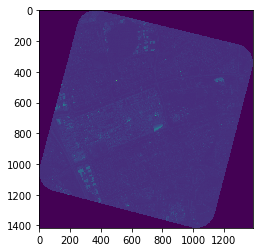

In [12]:
show(dataset, cmap='viridis');

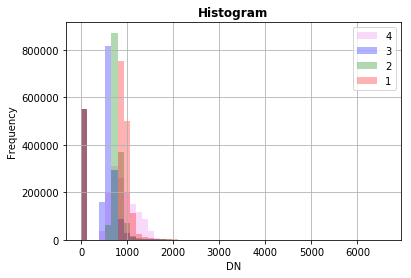

In [13]:
show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

# Matplotlib plotting

In [14]:
# load the bands into a 2d numpy arrays, need to check ordering
r, g, b, n = dataset.read()
r.shape

(1415, 1389)

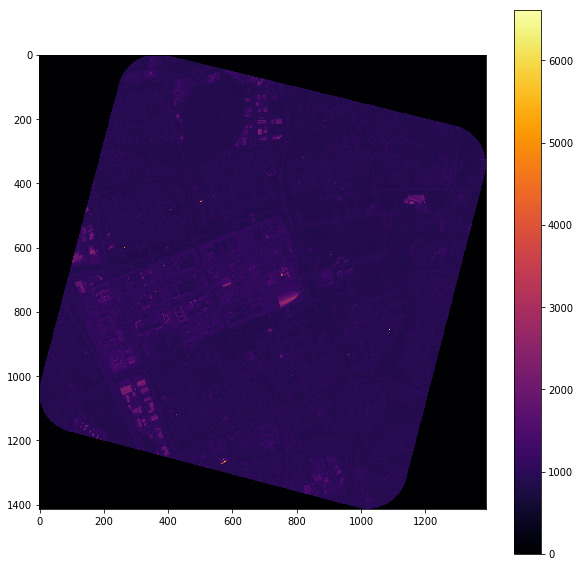

In [15]:
fig_len = 10
fig, ax = plt.subplots(figsize=(fig_len, fig_len))

# add a colorbar, and plot the red band

ax = plt.imshow(r)
ax.set_cmap('inferno')
plt.colorbar()

# Display the results
plt.show()